In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

First we need to import the dataset and select which columns to keep

In [2]:
data = pd.read_pickle('df_final_cleaned.pkl')

In [3]:
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Postal_code', 'postal_code',
       'num_schools', 'school_rank_nearby', 'Year', 'Month', 'low', 'high',
       'storey', 'Remaining_years_y', 'Remaining_months', 'Remaining_years',
       'Remaining_lease_years'],
      dtype='object')

In [4]:
columns_to_keep = ['month','Year','Month','town','flat_type','storey','floor_area_sqm','flat_model','Remaining_lease_years','Postal_code','num_schools',"school_rank_nearby",'resale_price']

In [5]:
df = pd.DataFrame(data[columns_to_keep])

In [6]:
df.head()

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price
0,2017-01,2017,01,ANG MO KIO,2 ROOM,11,44.0,Improved,61.333333,560406,11.0,0,232000.0
1,2017-01,2017,01,ANG MO KIO,3 ROOM,2,67.0,New Generation,60.583333,560108,8.0,0,250000.0
2,2017-01,2017,01,ANG MO KIO,3 ROOM,2,67.0,New Generation,62.416667,560602,4.0,0,262000.0
3,2017-01,2017,01,ANG MO KIO,3 ROOM,5,68.0,New Generation,62.083333,560465,10.0,0,265000.0
4,2017-01,2017,01,ANG MO KIO,3 ROOM,2,67.0,New Generation,62.416667,560601,4.0,0,265000.0


In [7]:
df.describe()

,storey,floor_area_sqm,Remaining_lease_years,num_schools,school_rank_nearby,resale_price
count,62410.000000,62410.000000,62410.000000,62410.000000,62410.0000,6.241000e+04
mean,8.619372,97.823086,74.537168,8.972472,0.7585,4.391509e+05
std,5.744786,24.286204,12.420809,3.555794,0.7591,1.540182e+05
min,2.000000,31.000000,46.083333,1.000000,0.0000,1.500000e+05
25%,5.000000,82.000000,65.166667,7.000000,0.0000,3.300000e+05
50%,8.000000,95.000000,74.500000,9.000000,1.0000,4.070000e+05
75%,11.000000,113.000000,83.416667,11.000000,1.0000,5.120000e+05
max,50.000000,249.000000,96.666667,20.000000,3.0000,1.205000e+06


Most of our features are categorical, we would like to do some simple exploration and grouping where possible

In [8]:
def Count (series):
    keys = series.unique()
    count_dict = dict.fromkeys(keys,0)

    for item in series:
        count_dict[item] += 1
    return count_dict

In [9]:
flat_type_count = Count(df.flat_type)

In [10]:
flat_type_count

{'2 ROOM': 885,
 '3 ROOM': 15117,
 '4 ROOM': 25803,
 '5 ROOM': 15483,
 'EXECUTIVE': 5060,
 '1 ROOM': 29,
 'MULTI-GENERATION': 33}

We will group 1 room and 2 room as one category as both entries are of little value. Similarly for multi-gen and executive flats

In [11]:
def redefine_type (flat):
    if flat == "2 ROOM" or flat == "1 ROOM":
        return "1 / 2 ROOM"
    elif flat == "EXECUTIVE" or flat == 'MULTI-GENERATION':
        return 'EXECUTIVE & MULTI-GENERATION'
    else: return flat

In [12]:
df['flat_type'] = df.flat_type.apply(lambda x: redefine_type(x))

In [13]:
model_type_count = Count(df.flat_model)

In [14]:
model_type_count

{'Improved': 15630,
 'New Generation': 8782,
 'DBSS': 907,
 'Standard': 1752,
 'Apartment': 2554,
 'Simplified': 2677,
 'Model A': 20070,
 'Premium Apartment': 6792,
 'Adjoined flat': 114,
 'Model A-Maisonette': 106,
 'Maisonette': 1877,
 'Type S1': 114,
 'Type S2': 62,
 'Model A2': 876,
 'Terrace': 38,
 'Improved-Maisonette': 13,
 'Premium Maisonette': 7,
 'Multi Generation': 33,
 'Premium Apartment Loft': 6}

In [15]:
def redefine_model (flat):
    if flat == 'Model A-Maisonette' or flat == 'Improved-Maisonette' or flat == 'Premium Maisonette':
        return 'Maisonette'
    elif flat == 'Premium Apartment' or flat == 'Premium Apartment Loft':
        return 'Apartment'
    elif flat == 'Terrace' or flat == 'Multi Generation' or flat =='Adjoined flat':
        return "Terrace/Multi-Gen/Adjoined"
    elif flat == 'Model A2':
        return "Model A"
    elif flat == 'Type S1' or flat == 'Type S2':
        return "Type S"
    else: return flat

In [16]:
df['flat_model'] = df.flat_model.apply(lambda x: redefine_model(x))

In [17]:
model_type_count = Count(df.flat_model)
model_type_count

{'Improved': 15630,
 'New Generation': 8782,
 'DBSS': 907,
 'Standard': 1752,
 'Apartment': 9352,
 'Simplified': 2677,
 'Model A': 20946,
 'Terrace/Multi-Gen/Adjoined': 185,
 'Maisonette': 2003,
 'Type S': 176}

In [18]:
town_count = Count(df.town)

In [39]:
town_count

{'ANG MO KIO': 2809,
 'BEDOK': 3348,
 'BISHAN': 1233,
 'BUKIT BATOK': 2394,
 'BUKIT MERAH': 2516,
 'BUKIT PANJANG': 2262,
 'BUKIT TIMAH': 184,
 'CENTRAL AREA': 525,
 'CHOA CHU KANG': 2627,
 'CLEMENTI': 1374,
 'GEYLANG': 1520,
 'HOUGANG': 2904,
 'JURONG EAST': 1401,
 'JURONG WEST': 4812,
 'KALLANG/WHAMPOA': 1866,
 'MARINE PARADE': 372,
 'PASIR RIS': 1775,
 'PUNGGOL': 3888,
 'QUEENSTOWN': 1670,
 'SEMBAWANG': 1763,
 'SENGKANG': 4835,
 'SERANGOON': 1292,
 'TAMPINES': 3963,
 'TOA PAYOH': 2124,
 'WOODLANDS': 4850,
 'YISHUN': 4151}

We may consider to drop this variable as model type may implied the floor area and could be corelated with flat_type as well

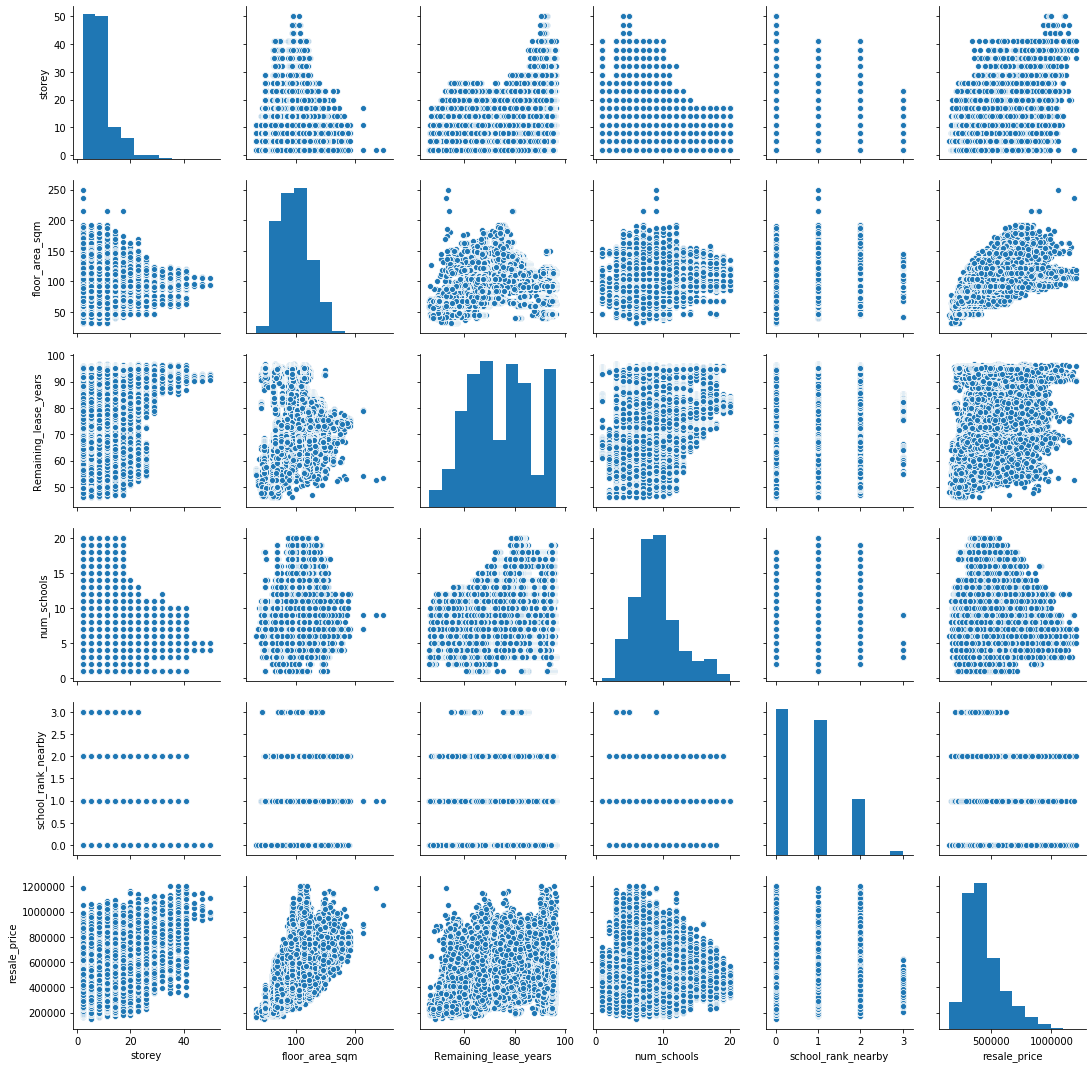

In [18]:
columns_to_plot = ['storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby",'resale_price']
sns.pairplot(df[columns_to_plot])

In [19]:
df.corr()

,storey,floor_area_sqm,Remaining_lease_years,num_schools,school_rank_nearby,resale_price
storey,1.000000,0.019081,0.279905,-0.059488,0.058915,0.374200
floor_area_sqm,0.019081,1.000000,0.221270,0.099638,0.002712,0.632863
Remaining_lease_years,0.279905,0.221270,1.000000,0.314682,0.297797,0.327372
num_schools,-0.059488,0.099638,0.314682,1.000000,0.144722,-0.040443
school_rank_nearby,0.058915,0.002712,0.297797,0.144722,1.000000,-0.114782
resale_price,0.374200,0.632863,0.327372,-0.040443,-0.114782,1.000000


We note the price distribution is right skewed > consider to transform if needed

Floor_area is a little bit skewed. need further test to confirm;

Storey can be transformed into categorical variable and so does school rank nearby

In [21]:
df.sample(6)

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price
28016,2018-05-01,2018,05,WOODLANDS,5 ROOM,8,120.0,Improved,81.250000,730539,10.0,1,438000.0
15976,2017-10-01,2017,10,KALLANG/WHAMPOA,3 ROOM,11,68.0,Improved,53.250000,330034,6.0,2,360000.0
48257,2019-04-01,2019,04,WOODLANDS,4 ROOM,11,89.0,Simplified,73.750000,730321,7.0,2,310000.0
17958,2017-11-01,2017,11,PUNGGOL,4 ROOM,11,94.0,Model A,95.416667,823624,14.0,2,436000.0
39155,2018-11-01,2018,11,CENTRAL AREA,4 ROOM,26,87.0,Improved,64.333333,052335,4.0,0,668000.0
26967,2018-05-01,2018,05,HOUGANG,4 ROOM,8,84.0,Simplified,68.000000,530512,11.0,0,362000.0


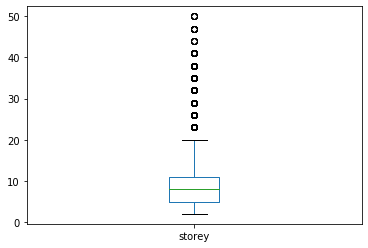

In [121]:
df.storey.plot.box()

In [122]:
df.storey.describe()

count    62410.000000
mean         8.619372
std          5.744786
min          2.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         50.000000
Name: storey, dtype: float64

In [19]:
def redefine_storey (storey):
    if 1< storey <= 7:
        return "0_LowFlr"
    elif storey <= 11:
        return "1_MediumFlr"
    else: return "2_HighFlr"

In [20]:
df['storey_groups'] = df.storey.apply(lambda x: redefine_storey(x))

In [21]:
df['storey'] = df['storey'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62410 entries, 0 to 62409
Data columns (total 14 columns):
month                    62410 non-null object
Year                     62410 non-null object
Month                    62410 non-null object
town                     62410 non-null object
flat_type                62410 non-null object
storey                   62410 non-null int32
floor_area_sqm           62410 non-null float64
flat_model               62410 non-null object
Remaining_lease_years    62410 non-null float64
Postal_code              62410 non-null object
num_schools              62410 non-null float64
school_rank_nearby       62410 non-null int64
resale_price             62410 non-null float64
storey_groups            62410 non-null object
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 6.9+ MB


In [24]:
categorical_features = ['Month','town','flat_type','storey_groups','school_rank_nearby',"flat_model"]

for column in categorical_features:
    category = list(df[column].unique())
    cat_dtype = pd.api.types.CategoricalDtype(categories=category)
    df[column] = df[column].astype(cat_dtype)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62410 entries, 0 to 62409
Data columns (total 14 columns):
month                    62410 non-null object
Year                     62410 non-null object
Month                    62410 non-null category
town                     62410 non-null category
flat_type                62410 non-null category
storey                   62410 non-null int32
floor_area_sqm           62410 non-null float64
flat_model               62410 non-null category
Remaining_lease_years    62410 non-null float64
Postal_code              62410 non-null object
num_schools              62410 non-null float64
school_rank_nearby       62410 non-null category
resale_price             62410 non-null float64
storey_groups            62410 non-null category
dtypes: category(6), float64(4), int32(1), object(3)
memory usage: 4.4+ MB


Split test train data according to time; Jun to Nov 2019 will be in the test set while Jan 2017 to May 2019 data will be in the training set

In [26]:
df.month  = pd.to_datetime(df.month)
data_test = df[df.month >= datetime.datetime(2019,6,1)] #put this aside until model selection and evaluation
data_train = df[df.month < datetime.datetime(2019,6,1)]

In [27]:
data_test.to_pickle('data_test.pkl')
data_train.to_pickle('data_train.pkl')

In [30]:
from sklearn.model_selection import train_test_split
seed = 111

In [53]:
def treat_features (df):
    columns_to_keep = ['Month','town','flat_type',"flat_model",'storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby"]
    y = pd.Series(df['resale_price'])
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['Month','town','flat_type','school_rank_nearby',"flat_model"]
    X = pd.get_dummies(x,columns = categorical_features,drop_first = True)
    return train_test_split(X,y,test_size = 0.2,random_state = seed)

In [54]:
X_train,X_test,y_train,y_test = treat_features(data_train)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40422 entries, 50295 to 12116
Data columns (total 56 columns):
storey                                    40422 non-null int32
floor_area_sqm                            40422 non-null float64
Remaining_lease_years                     40422 non-null float64
num_schools                               40422 non-null float64
Month_02                                  40422 non-null uint8
Month_03                                  40422 non-null uint8
Month_04                                  40422 non-null uint8
Month_05                                  40422 non-null uint8
Month_06                                  40422 non-null uint8
Month_07                                  40422 non-null uint8
Month_08                                  40422 non-null uint8
Month_09                                  40422 non-null uint8
Month_10                                  40422 non-null uint8
Month_11                                  40422 non-null uint8

Ready to start our first model: Ordinary least square model.

It also serves an important purpose to check if the data is proper for linear regression. If not we need to further feature engineered the data

In [55]:
import statsmodels.api as sm

In [40]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_test)

In [60]:
model = sm.OLS(y_train,X)
results = model.fit()

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     5736.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:52:45   Log-Likelihood:            -4.9954e+05
No. Observations:               40422   AIC:                         9.992e+05
Df Residuals:                   40376   BIC:                         9.996e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -3.177e+05   5229.336    -60.761      0.000   -3.28e+05   -3.07e+05
storey                                  4525.6256     54.980     82.315      0.000    4417.864    4633.387
floor_area_sqm                          3837.0341     49.433     77.621      0.000    3740.144    3933.924
Remaining_lease_years                   4613.2773     42.887    107.567      0.000    4529.217    4697.338
num_schools                             2155.1112    148.166     14.545      0.000    1864.702    2445.521
town_BEDOK                             -3125.1125   1916.843     -1.630      0.103   -6882.168     631.943
town_BISHAN                             9.904e+04   2509.745     39.463      0.000    9.41e+04    1.04e+05
town_BUKIT BATOK                       -7.724e+04   2157.210    -35.805      0.000   -8.15e+04    -7.3e+04
town_BUKIT MERAH                        1.126e+05   2045.594     55.030      0.000    1.09e+05    1.17e+05
town_BUKIT PANJANG                     -1.317e+05   2399.174    -54.890      0.000   -1.36e+05   -1.27e+05
town_BUKIT TIMAH                        2.104e+05   5462.874     38.518      0.000       2e+05    2.21e+05
town_CENTRAL AREA                       1.169e+05   4227.032     27.649      0.000    1.09e+05    1.25e+05
town_CHOA CHU KANG                     -1.638e+05   2297.896    -71.280      0.000   -1.68e+05   -1.59e+05
town_CLEMENTI                           4.879e+04   2356.786     20.702      0.000    4.42e+04    5.34e+04
town_GEYLANG                              4.7e+04   2360.067     19.915      0.000    4.24e+04    5.16e+04
town_HOUGANG                           -8.405e+04   2010.670    -41.800      0.000    -8.8e+04   -8.01e+04
town_JURONG EAST                       -5.587e+04   2414.745    -23.137      0.000   -6.06e+04   -5.11e+04
town_JURONG WEST                       -1.289e+05   1822.929    -70.728      0.000   -1.33e+05   -1.25e+05
town_KALLANG/WHAMPOA                    5.827e+04   2271.395     25.655      0.000    5.38e+04    6.27e+04
town_MARINE PARADE                      1.655e+05   3919.218     42.233      0.000    1.58e+05    1.73e+05
town_PASIR RIS                         -1.038e+05   2276.762    -45.605      0.000   -1.08e+05   -9.94e+04
town_PUNGGOL                           -1.469e+05   2879.304    -51.002      0.000   -1.52e+05   -1.41e+05
town_QUEENSTOWN                         1.274e+05   2384.812     53.410      0.000    1.23e+05    1.32e+05
town_SEMBAWANG                         -1.875e+05   2332.403    -80.387      0.000   -1.92e+05   -1.83e+05
town_SENGKANG                          -1.582e+05   2410.351    -65.620      0.000   -1.63e+05   -1.53e+05
town_SERANGOON                         -1950.2353   2415.147     -0.808      0.419   -6

In [62]:
y_pred = results.predict(X_pred)

### Assumption check:
1. The residuals seem to follow Gaussian assumption while reading skew and kurtosis (Skew = 0.633 and Kurtosis = 4.5). We can try to treat the dependent variable to see if it improves the assumption

2. Multicollinearity exists as the floor area and the flat flat is correlated; p-value also suggests the similarly. However, we would not remove the flat_type as it is an important consideration for actual buyers

However, we would like to check the residual plots just to make sure that it is reflecting the same

In [44]:
def diagnostic_plot(y_true,y_pred):
    plt.figure(figsize=(15,6))
    
    plt.subplot(1, 2, 1)
    res = y_true - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    

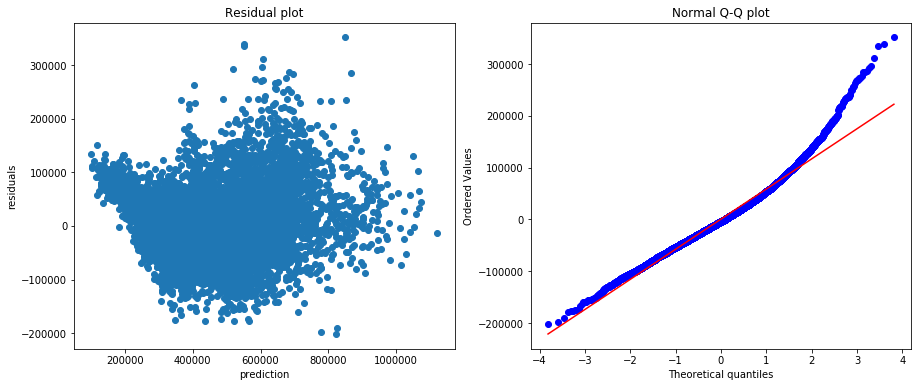

In [59]:
diagnostic_plot(y_test,y_pred)
plt.savefig('resplt_first_model.png')

The QQ plot shows a curvy behavior, we need to consider transforming the target variable;

residual plot also show certain pattern which is not ideal

### Feature selection:
-> "Month" proves to be a redundant feature (p-value >0.05) > we will remove it

-> Some features from town seems to be insignificant and so does some school ranking; We will keep it for now

The rest of the features looks significant for the model

In [46]:
def treat_features_logy (df):
    columns_to_keep = ['town','flat_type','storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = pd.Series(df['resale_price'].apply(lambda x: np.log(x)))
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','flat_type','school_rank_nearby','flat_model']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = True)
    return train_test_split(X,y,test_size = 0.2,random_state = seed)

In [47]:
X_train,X_test,y_train,y_test = treat_features_logy(data_train)

In [48]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_test)
model = sm.OLS(y_train,X)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     7019.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:45:55   Log-Likelihood:                 32111.
No. Observations:               40422   AIC:                        -6.413e+04
Df Residuals:                   40376   BIC:                        -6.373e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.1769      0.010   1101.502      0.000      11.157      11.197
storey                                     0.0084      0.000     78.966      0.000       0.008       0.009
floor_area_sqm                             0.0083   9.59e-05     86.528      0.000       0.008       0.008
Remaining_lease_years                      0.0099   8.32e-05    119.317      0.000       0.010       0.010
num_schools                                0.0046      0.000     15.975      0.000       0.004       0.005
town_BEDOK                                 0.0026      0.004      0.700      0.484      -0.005       0.010
town_BISHAN                                0.1794      0.005     36.834      0.000       0.170       0.189
town_BUKIT BATOK                          -0.1664      0.004    -39.742      0.000      -0.175      -0.158
town_BUKIT MERAH                           0.2208      0.004     55.617      0.000       0.213       0.229
town_BUKIT PANJANG                        -0.2507      0.005    -53.859      0.000      -0.260      -0.242
town_BUKIT TIMAH                           0.3770      0.011     35.565      0.000       0.356       0.398
town_CENTRAL AREA                          0.3110      0.008     37.914      0.000       0.295       0.327
town_CHOA CHU KANG                        -0.3372      0.004    -75.632      0.000      -0.346      -0.328
town_CLEMENTI                              0.1083      0.005     23.678      0.000       0.099       0.117
town_GEYLANG                               0.0865      0.005     18.892      0.000       0.078       0.095
town_HOUGANG                              -0.1663      0.004    -42.627      0.000      -0.174      -0.159
town_JURONG EAST                          -0.1096      0.005    -23.384      0.000      -0.119      -0.100
town_JURONG WEST                          -0.2688      0.004    -75.998      0.000      -0.276      -0.262
town_KALLANG/WHAMPOA                       0.1295      0.004     29.392      0.000       0.121       0.138
town_MARINE PARADE                         0.3672      0.008     48.291      0.000       0.352       0.382
town_PASIR RIS                            -0.1935      0.004    -43.797      0.000      -0.202      -0.185
town_PUNGGOL                              -0.2642      0.006    -47.289      0.000      -0.275      -0.253
town_QUEENSTOWN                            0.2559      0.005     55.311      0.000       0.247       0.265
town_SEMBAWANG                            -0.3853      0.005    -85.137      0.000      -0.394      -0.376
town_SENGKANG                             -0.2992      0.005    -63.974      0.000      -0.308      -0.290
town_SERANGOON                             0.0021      0.005      0.451      0.652     

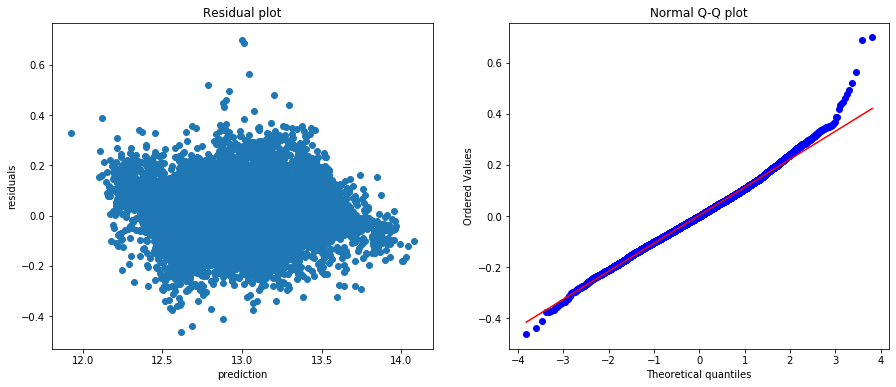

In [49]:
y_pred = results.predict(X_pred)
diagnostic_plot(y_test,y_pred)
#much better now
plt.savefig("residualplot_ylog.png")

Treating the dependent variable helps to improve the model fitting (R2 from 0.857 to 0.883);  

We also observe significant improvement of residual normality assumptions:
* Residual plot shows a random behavior and constant variance with just a few outliners;
* QQ plot mainly follows straight line behavior with a right tail; The data set may have a few observation that is quite right skewed
* Observation also confirmed by improved score of skewness and Kurtosis stats

In [66]:
np.e**0.0566

1.0582324327525154

In [67]:
np.e**0.0542

1.0556957201866104

In [51]:
data_train.flat_model.unique()

[Improved, New Generation, DBSS, Standard, Apartment, Simplified, Model A, Terrace/Multi-Gen/Adjoined, Maisonette, Type S]
Categories (10, object): [Improved, New Generation, DBSS, Standard, ..., Model A, Terrace/Multi-Gen/Adjoined, Maisonette, Type S]

In [63]:
np.e**0.008315543423975908

1.008350213588984